In [25]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import cv2
import os
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [12]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'C:/Users/user/Desktop/cnic/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('urdu'):
        output = 1.0
    # load image
    photo = load_img(folder + file, target_size=(500, 500))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(73, 500, 500, 3) (73,)


In [13]:
from sklearn.model_selection import train_test_split
photos= photos/255.0
X_train, X_test, y_train, y_test = train_test_split( photos, labels, test_size=0.2, random_state=42)


In [14]:
X_train.shape

(58, 500, 500, 3)

In [17]:
# define cnn model
from tensorflow.keras.optimizers import SGD
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(500, 500, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
model = define_model()

In [19]:
 classification_cnic = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=6, verbose=1)

Train on 58 samples, validate on 15 samples
Epoch 1/10
58/58 [==============================] - 216s 4s/sample - loss: 5.0238 - accuracy: 0.6897 - val_loss: 0.8149 - val_accuracy: 0.7333
Epoch 2/10
58/58 [==============================] - 225s 4s/sample - loss: 0.5911 - accuracy: 0.7241 - val_loss: 0.6191 - val_accuracy: 0.7333
Epoch 3/10
58/58 [==============================] - 231s 4s/sample - loss: 0.5775 - accuracy: 0.7414 - val_loss: 0.5306 - val_accuracy: 0.7333
Epoch 4/10
58/58 [==============================] - 218s 4s/sample - loss: 0.4313 - accuracy: 0.7414 - val_loss: 0.4649 - val_accuracy: 0.7333
Epoch 5/10
58/58 [==============================] - 223s 4s/sample - loss: 0.2919 - accuracy: 0.8793 - val_loss: 0.4286 - val_accuracy: 0.7333
Epoch 6/10
58/58 [==============================] - 244s 4s/sample - loss: 0.1848 - accuracy: 0.9828 - val_loss: 0.4419 - val_accuracy: 0.8000
Epoch 7/10
58/58 [==============================] - 239s 4s/sample - loss: 0.1406 - accuracy: 0.94

Text(0.5, 0, 'Epoch')

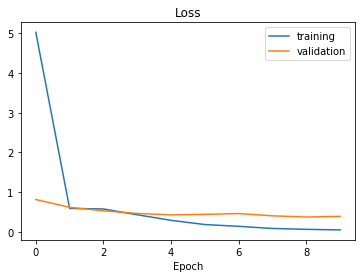

In [20]:
plt.plot(classification_cnic.history['loss'])
plt.plot(classification_cnic.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')